# Intro

이번 장에서는 matplotlib, seaborn 패키지를 활용하여 판다스 데이터프레임을 시각화하는 기본적인 방법들을 다룹니다. 먼저 seaborn의 다양한 플롯과 차트들을 다룬 후, matplotlib의 기능들을 공부하도록 하겠습니다. 사실 seaborn 패키지는 matplotlib을 기반으로 만들어진 패키지입니다. 하지만 seaborn이 더 쉽고 직관적인 인터페이스를 제공하기 때문에 seaborn을 먼저 다루고 matplotlib을 다루도록 하겠습니다.

- matplotlib version 3.0.3 을 사용합니다.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
gapminder = pd.read_csv("../data/gapminder.csv")
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


먼저 matplotlib, seaborn, pandas 패키지를 불러옵니다. plt, sns, pd 라는 별칭은 파이썬 코딩 관례이므로 반드시 지킬 필요는 없지만, 존중하는 편이 좋습니다. 다음으로 실습용 갭마인더 데이터를 읽어옵니다. 갭마인더 데이터는 국가별, 연도별 기대수명/인구수/1인당GDP 등을 기록한 데이터입니다. 

# 1. 기본적인 시각화: seaborn

이 글에서 다룰 플롯 함수들은 다음과 같습니다. seaborn 함수들의 전체 목록은 [seaborn API 레퍼런스](https://seaborn.pydata.org/api.html)를 참고하시기 바랍니다.


- sns.distplot: 밀도 그래프
- sns.barplot: 막대 그래프
- sns.boxplot & sns.violinplot: 박스플롯, 바이올린플롯
- sns.lineplot: 선 그래프
- sns.scatterplot & sns.pairplot: 산점도, 페어플롯
- sns.heatmap: 히트맵

지금부터 다룰 시각화는 모두 판다스의 시리즈와 데이터프레임을 활용합니다. 즉 기본적으로 판다스 시리즈와 데이터프레임을 다룰 능력이 있어야 배운 내용을 제대로 활용할 수 있습니다. 이번 장에서도 판다스 데이터에 대한 조작 과정은 가능한 자세히 설명할 것입니다. **시각화 코드를 따라가는 것도 중요하지만, 판다스로 데이터를 조작하는 과정들도 유심히 살펴보시기 바랍니다!**

## 1.1. distplot

`sns.distplot` 함수는 1차원 배열을 받아 밀도 그래프를 그립니다. 판다스 데이터프레임의 컬럼 하나는 1차원의 배열이므로 즉시 밀도 그래프를 그릴 수 있습니다. 아래는 갭마인더 데이터로 그린 2007년 기준 기대수명 밀도 그래프입니다. gapminder 데이터프레임에서 2007년 데이터만 선택한 후, lifeExp 컬럼을 선택합니다. 이 결과를 sns.distplot 함수에 넣어주면 밀도 그래프가 생성됩니다.

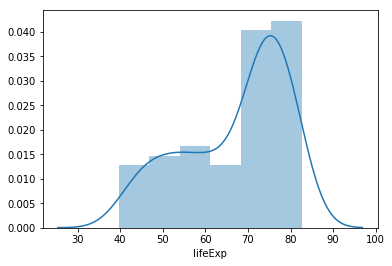

In [5]:
# gapminder 데이터프레임에서 2007년 데이터만 선택: gapminder[gapminder.year == 2007]
# lifeExp 컬럼을 선택: .lifeExp
tmp = gapminder[gapminder.year==2007].lifeExp
sns.distplot(tmp)

### distplot의 인자들

distplot의 인자|내용/기능
---|---
a|리스트, 넘파이 어레이, 판다스 시리즈 등 데이터
bins|히스토그램 막대 갯수(구간의 크기)를 결정
hist|False이면 히스토그램을 생략
kde|False이면 kde를 생략
rug|True이면 러그플롯을 함께 그림

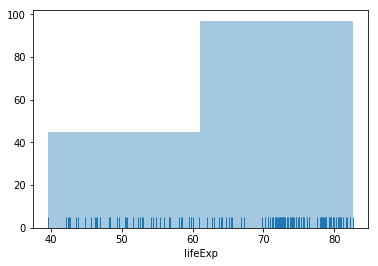

In [6]:
sns.distplot(
    a = gapminder[gapminder.year==2007].lifeExp, # 데이터
    bins = 2, # 히스토그램 막대 갯수를 결정합니다
    hist =  True, # False이면 히스토그램을 생략합니다
    kde = False, # False이면 kde를 생략합니다
    rug = True # True 이면 러그플롯을 함께 그립니다
)

**예제 1.1 2002년 gdpPercap 변수의 밀도 그래프를 그려보세요.**

**풀이**

**1) 2002년을 기준으로 데이터를 필터링**, **2) gdpPercap 변수를 선택**, **3) sns.distplot() 함수에 전달**하면 됩니다. 필터링 및 컬럼 선택 과정은 본문 본문에서 했던 과정과 완전히 동일합니다. 이 데이터를 `sns.distplot` 에 집어넣어주면 끝입니다.

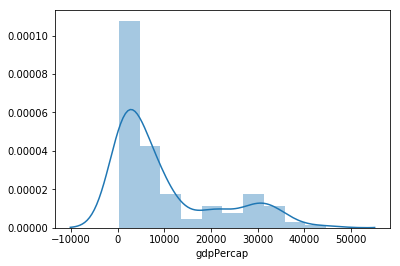

In [7]:
sns.distplot(gapminder[gapminder.year==2002].gdpPercap)

## 1.2. barplot

`sns.barplot`은 막대 그래프를 그리는 함수입니다. 막대 그래프를 그리기 위해서는 x와 y가 필요하며, seaborn 함수에 x와 y를 전달하는 코드 패턴은 다음과 같습니다. **boxplot, lineplot, scatterplot 등 x와 y 두 개의 변수를 받는 seaborn 플롯에서 계속 사용하는 패턴이므로 눈에 잘 익혀두시기 바랍니다.**

### 패턴: sns.barplot(x = x변수명, y = y변수명, data = 데이터프레임)

In [8]:
# 2007년 데이터만 선택: gapminder[gapminder.year==2007]
# 대륙별로 그루핑: .groupby("continent")
# 그루핑된 데이터의 평균 계산: .mean()
# 인덱스를 초기화하고 원래 인덱스를 컬럼으로 내보냄: .reset_index()
tmp = gapminder[gapminder.year==2007].groupby("continent").mean().reset_index()
tmp.head()

,continent,year,lifeExp,pop,gdpPercap
0,Africa,2007.0,54.806038,1.787576e+07,3089.032605
1,Americas,2007.0,73.608120,3.595485e+07,11003.031625
2,Asia,2007.0,70.728485,1.155138e+08,12473.026870
3,Europe,2007.0,77.648600,1.953662e+07,25054.481636
4,Oceania,2007.0,80.719500,1.227497e+07,29810.188275


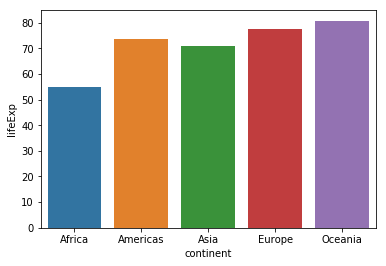

In [9]:
sns.barplot(data=tmp, x="continent", y="lifeExp")

데이터를 잘 조작했다면 이후의 과정은 쉽습니다. sns.barplot 함수에 만들어놓은 tmp 데이터를 전달하고, x 변수를 "continent"로, y 변수를 "lifeExp" 변수로 지정하였습니다. 

### barplot의 인자들

인자|내용/기능
---|---
hue|그룹별로 색을 구분합니다
dodge|True이면 hue 인자에 의한 구분을 쌓아올려서 하나의 막대로, False이면 분리해서 여러 막대로 표현
orient|막대 그래프의 방향을 지정합니다("v", "h"). horizontal 플롯을 그릴 때는 x, y축을 알맞게 바꿔줘야 합니다
order|범주형 변수들의 순서를 지정합니다
hueoreder|hue 변수의 순서를 지정합니다

**hue는 seaborn을 활용하면서 계속해서 마주치게 될 인자입니다. hue는 2차원 평면에서 색을 통해 하나의 변수를 추가적으로 표현할 수 있게 해줍니다.** 아래 예시 코드를 보겠습니다. 

In [10]:
# 1957년, 2007년의 데이터를 선택: gapminder[gapminder.year.isin([1957, 2007])]
# 연도별, 대륙별로 그루핑: .groupby(["year","continent"])
# 그루핑된 데이터에서 평균 계산: .mean()
# 인덱스를 초기화하고 원래 인덱스를 컬럼으로 내보냄: .reset_index()
tmp = gapminder[gapminder.year.isin([1957,2007])].groupby(["year","continent"]).mean().reset_index()
tmp.head()   

,year,continent,lifeExp,pop,gdpPercap
0,1957,Africa,41.266346,5.093033e+06,1385.236062
1,1957,Americas,55.960280,1.547816e+07,4616.043733
2,1957,Asia,49.318544,4.735699e+07,5787.732940
3,1957,Europe,66.703067,1.459635e+07,6963.012816
4,1957,Oceania,70.295000,5.970988e+06,11598.522455


위와 같이 조작한 데이터를 가지고 대륙별 기대 수명을 나타내는 막대 그래프를 그립니다. 역시 데이터 조작 과정만 이해하면 그 후는 어렵지 않습니다. x, y에는 각각 "continent", "lifeExp"를 전달하고, hue 인자에 "year"를 전달하여 1957년과 2007년의 기대수명을 비교할 수 있도록 하였습니다.

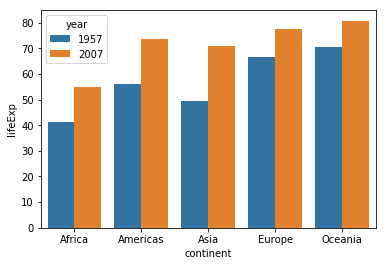

In [11]:
sns.barplot(
    data = tmp,
    x = "continent",
    y = "lifeExp",
    hue = "year"
)

**예제 1.2. 2007년 gapminder 데이터에서 1인당 GDP 상위 10개 국가를 추출하고 막대 그래프로 시각화하세요. 조건은 다음과 같습니다.**

**- x축이 1인당 GDP, y축이 국가입니다. 즉 horizontal barplot 을 그려야 합니다.**

**- 막대의 색은 대륙별로 구분해야 합니다.**

**- 1인당 GDP가 높은국가부터 낮은 국가 순으로 막대를 정렬해야 합니다.**

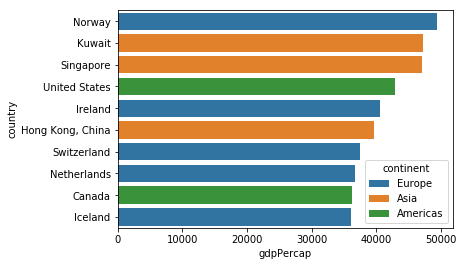

In [13]:
# 다음과 같은 플롯을 그려주시면 됩니다

**풀이**

먼저 조건에 맞는 데이터프레임을 만들어줍니다. 

In [14]:
# year 변수가 2007인 데이터만 선택: gapminder[gapminder.year==2007]: 
# "gdpPercap" 변수의 내림차순으로 데이터프레임을 정렬: .sort_values("gdpPercap", ascending=False)
# 가장 위의 10개 행 선택: .head(10)
tmp = gapminder[gapminder.year==2007].sort_values("gdpPercap", ascending=False).head(10)
tmp

,country,continent,year,lifeExp,pop,gdpPercap
1151,Norway,Europe,2007,80.196,4627926,49357.19017
863,Kuwait,Asia,2007,77.588,2505559,47306.98978
1367,Singapore,Asia,2007,79.972,4553009,47143.17964
1619,United States,Americas,2007,78.242,301139947,42951.65309
755,Ireland,Europe,2007,78.885,4109086,40675.99635
671,"Hong Kong, China",Asia,2007,82.208,6980412,39724.97867
1487,Switzerland,Europe,2007,81.701,7554661,37506.41907
1091,Netherlands,Europe,2007,79.762,16570613,36797.93332
251,Canada,Americas,2007,80.653,33390141,36319.23501
695,Iceland,Europe,2007,81.757,301931,36180.78919


위처럼 데이터프레임을 미리 정렬해놓았다면, 3번 조건에 대해서는 신경쓸 필요가 없습니다. 여기까지의 과정을 이해했다면 다음부터는 어렵지 않을 것입니다. 수평으로 막대 그래프를 그릴 것이므로 x 변수에는 gdpPercap, y 변수에는 country를 전달합니다. hue 인자에는 continent를 지정하여 대륙별로 막대의 색깔이 달라지도록 합니다. 막대 간 간격을 맞추기 위해 dodge=False 로 지정합니다. 마지막으로 orient 인자에는 'h'를 전달하여 수평으로 그래프가 그려지도록 합니다. 

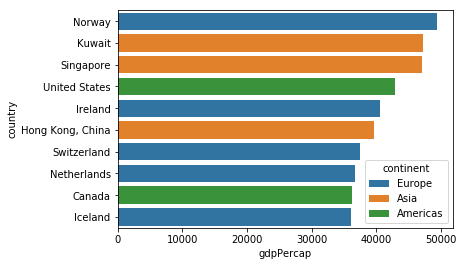

In [15]:
sns.barplot(
    data=tmp,
    x='gdpPercap', # x 변수 선택(수평으로 그릴 것이므로 x가 gdpPercap)
    y='country', # y 변수 선택(수평으로 그릴 것이므로 y가 country)
    hue='continent', # 대륙별로 색깔 입히기
    dodge=False, # hue 로 지정한 그룹을 stacked bar로 표현(간격 조정)
    orient="h" # 수평으로 눕힌 막대 그래프 그리기
) 

## 1.3. boxplot & violinplot

`sns.boxplot`은 말 그대로 박스플롯을 그리는 함수입니다. `sns.violinplot`은 박스플롯의 기능에 더해 분포를 좀 더 명확하게 확인할 수 있는 플롯입니다.

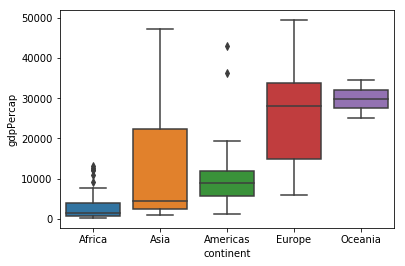

In [16]:
sns.boxplot(
    data = gapminder[gapminder.year==2007],
    x = 'continent',
    y = 'gdpPercap',
    order = ["Africa", "Asia", "Americas", "Europe", "Oceania"]
)

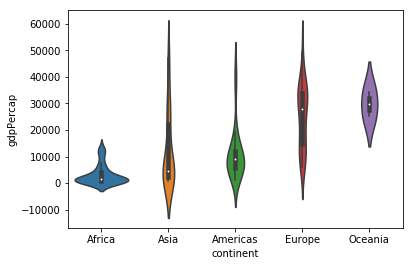

In [17]:
sns.violinplot(
    data = gapminder[gapminder.year==2007],
    x = 'continent',
    y = 'gdpPercap',
    order = ["Africa", "Asia", "Americas", "Europe", "Oceania"]
)

### boxplot의 인자들

인자|내용/기능
---|---
hue|그룹별로 색을 구분합니다
orient|막대 그래프의 방향을 지정합니다("v", "h"). horizontal 플롯을 그릴 때는 x, y축을 알맞게 바꿔줘야 합니다
order|범주형 변수들의 순서를 지정합니다
hueoreder|hue 변수의 순서를 지정합니다

**예제 1.3. 1957, 2007년 아시아와 유럽의 1인당 GDP를 박스플롯으로 비교하세요.**

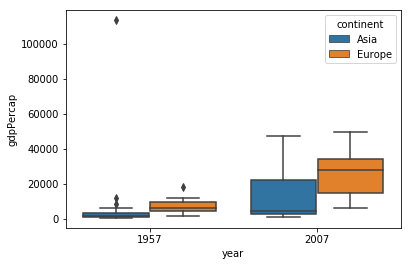

In [18]:
# 다음과 같이 그려주시면 됩니다.

**풀이**

먼저 조건에 맞는 데이터를 선택해야 합니다. 연도는 1957 또는 2007년이고 대륙은 아시아 또는 유럽입니다. 판다스 시리즈의 isin 메소드를 활용하여 데이터프레임을 필터링해줍니다. 

In [19]:
tmp = gapminder[gapminder.year.isin([1957, 2007]) & gapminder.continent.isin(["Asia","Europe"])]
tmp.head()

,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
13,Albania,Europe,1957,59.280,1476505,1942.284244
23,Albania,Europe,2007,76.423,3600523,5937.029526
73,Austria,Europe,1957,67.480,6965860,8842.598030


이 결과를 박스플롯으로 그려주기만 하면 됩니다. x축에는 연도, y축에는 1인당 GDP가 들어갔습니다. 색은 대륙별로 구분하였습니다. 따라서 x, y, hue 에 각각 'year', 'gdpPercap', 'continent' 를 전달해주면 됩니다.

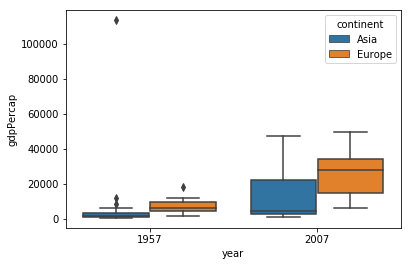

In [20]:
sns.boxplot(
    data = tmp,
    x = 'year',
    y = 'gdpPercap',
    hue = 'continent'
)

## 1.4. lineplot & pointplot

`lineplot`은 선 그래프를 그리는 함수입니다. 선 그래프를 그릴 때에도 x와 y가 필요하기 때문에, 바플롯이나 박스플롯을 그릴 때와 같은 코드 패턴을 사용합니다. pointplot은 lineplot과 유사하지만 데이터 포인트까지 플롯에 표현합니다. 라인플롯과 거의 똑같이 활용할 수 있으며, 포인트의 개수가 많지 않다면 라인플롯보다 유용한 경우가 많습니다.

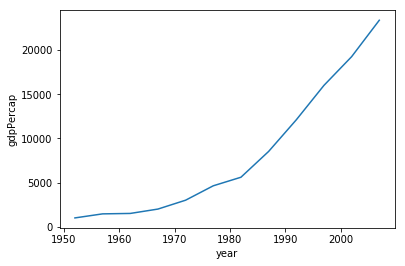

In [21]:
sns.lineplot(
    data = gapminder[gapminder.country=="Korea, Rep."],
    x = 'year',
    y = 'gdpPercap'
)

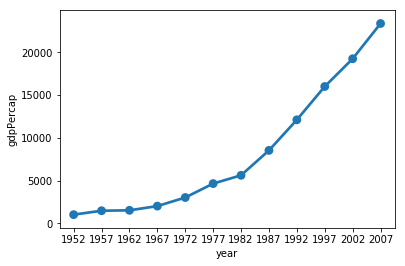

In [22]:
sns.pointplot(
    data = gapminder[gapminder.country=="Korea, Rep."],
    x = 'year',
    y = 'gdpPercap'
)

### lineplot의 인자들

인자|내용/기능
---|---
hue|그룹별로 색을 구분합니다

바플롯에서 다루었던 hue와 같습니다. 간단한 예시만 살펴보겠습니다. 연도에 따라서 남한과 북한의 1인당 GDP를 비교한 그래프입니다. 역시 데이터를 필터링하는 코드만 이해한다면 크게 어려울 것은 없습니다.

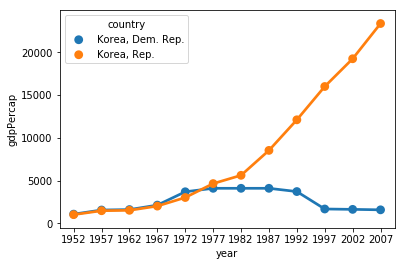

In [23]:
# "country"가 "Korea, Rep." 또는 "Korea, Dem. Rep." 인 데이터 선택
tmp = gapminder[gapminder.country.isin(["Korea, Rep.","Korea, Dem. Rep."])]
sns.pointplot(
    data = tmp,
    x = 'year',
    y = 'gdpPercap',
    hue = 'country'
)

**예제 1.4. 1952년 ~ 2007년까지 대륙별 인구 수 추이를 pointplot으로 그리고 대륙별로 색을 구분하세요.**

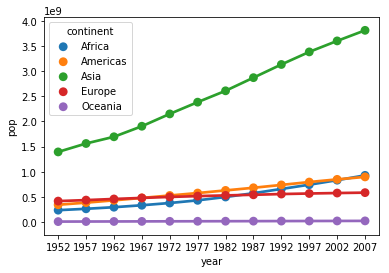

In [24]:
# 다음과 같이 그려주시면 됩니다.

**풀이**

우선 연도별, 대륙별 인구수 합계를 구해야 합니다. groupy 메소드에 sum 메소드를 연결해서 사용하면 쉽게 구현할 수 있습니다. 이렇게 만들어진 데이터프레임으로 포인트플롯을 그려주고, hue에 "continent"를 전달해서 대륙별로 색을 구분해주면 됩니다.

In [25]:
# 연도별, 대륙별로 그루핑: gapminder.groupby(["continent","year"])
# 그루핑된 상태에서 합계 구하기: .sum()
# 인덱스 초기화, 컬럼으로 내보내기: .reset_index()
tmp = gapminder.groupby(["continent","year"]).sum().reset_index()
tmp.head()

,continent,year,lifeExp,pop,gdpPercap
0,Africa,1952,2035.046,237640501,65133.768223
1,Africa,1957,2145.850,264837738,72032.275237
2,Africa,1962,2252.611,296516865,83100.098892
3,Africa,1967,2357.396,335289489,106618.917645
4,Africa,1972,2467.449,379879541,121660.015058


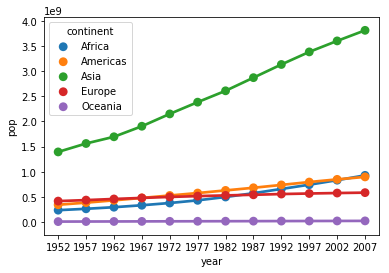

In [26]:
sns.pointplot(data=tmp,x="year",y="pop",hue="continent") # hue 구분해서 플로팅

## 1.5. scatterplot & pairplot

`sns.scatterplot` 은 산점도를 그리는 함수입니다. 산점도를 그리기 위해서는 역시 x축과 y축에 대응하는 변수들이 필요하고, 지금까지와 같이 sns.scatterplot(data = data, x = x변수, y = y변수) 패턴으로 플롯을 그릴 수 있습니다. 아래 예시 코드를 보겠습니다. 2007년 개별 국가들의 1인당 GDP와 기대 수명을 산점도로 나타냈습니다. 크게 어려운 것은 없습니다.

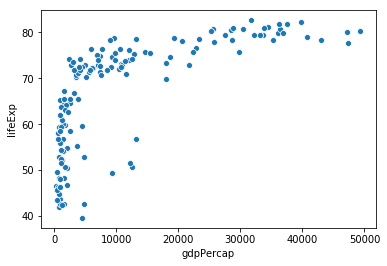

In [27]:
sns.scatterplot(data = gapminder[gapminder.year==2007], x="gdpPercap", y="lifeExp")

### scattertplot의 인자들

인자|내용/기능
---|---
hue|그룹별로 마커의 색이 달라집니다
style|그룹별로 마커의 모양이 달라집니다
size|주어진 값에 따라 마커의 크기가 달라집니다

hue는 지금까지 사용했던 hue와 같은 기능이고, style 역시 hue와 유사한 기능을 하는 인자입니다. size는 주어진 값에 따라 마커의 크기를 다르게 표시합니다. 아래 예시 코드를 보겠습니다. 위의 산점도와 거의 유사하지만, 대륙별로 색을 구분하고, 인구 수에 따라 마커의 크기가 달라지도록 했습니다.


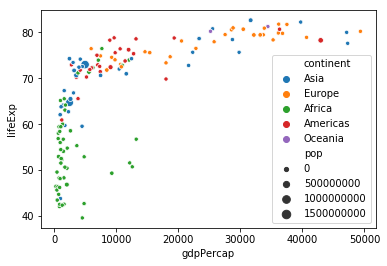

In [28]:
sns.scatterplot(
    data = gapminder[gapminder.year==2007],
    x = "gdpPercap",
    y = "lifeExp",
    hue = 'continent',
    size = 'pop'
)

**예제 1.5. 1997년 아시아 대륙의 1인당 GDP, 기대수명을 산점도로 나타내고 대한민국을 구분된 색으로 표시하세요**

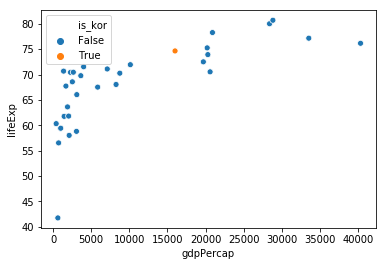

In [29]:
# 다음과 같이 그려주시면 됩니다.

**풀이**

데이터프레임을 잘 조작하기만 하면 쉽게 풀 수 있는 문제입니다. 우선 갭마인더 데이터프레임에서 1997년, 아시아 대륙만을 선택해야 합니다. 두 개의 조건을 걸어서 필터링해주면 1997년 아시아 대륙의 데이터만을 걸러낼 수 있습니다. 이제 다른 국가들로부터 대한민국을 식별할 수 있는 컬럼을 생성해야 합니다. assign 메소드를 활용하여 is_kor 컬럼을 생성합니다. is_kor 컬럼은 country 컬럼이 "Korea, Rep."일 경우 True이고, 아니면 False가 됩니다. 이 컬럼을 hue로 활용하여 플롯을 그리면 대한민국만을 다른 색으로 표시할 수 있습니다.

In [30]:
tmp = gapminder[(gapminder.year==1997) & (gapminder.continent=='Asia')]
tmp = tmp.assign(is_kor = tmp.country=="Korea, Rep.")
tmp.head()

,country,continent,year,lifeExp,pop,gdpPercap,is_kor
9,Afghanistan,Asia,1997,41.763,22227415,635.341351,False
93,Bahrain,Asia,1997,73.925,598561,20292.016790,False
105,Bangladesh,Asia,1997,59.412,123315288,972.770035,False
225,Cambodia,Asia,1997,56.534,11782962,734.285170,False
297,China,Asia,1997,70.426,1230075000,2289.234136,False


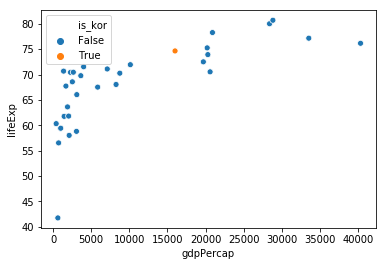

In [31]:
sns.scatterplot(data=tmp, x="gdpPercap",y="lifeExp",hue='is_kor')

`sns.scatterplot` 이 두 변수를 활용하여 산점도를 그린다면, `sns.pairplot`은 여러 개의 변수 쌍을 활용하여 산점도를 그립니다. pairplot은 연속형 변수들 간의 상관관계를 파악하는데 유용합니다.

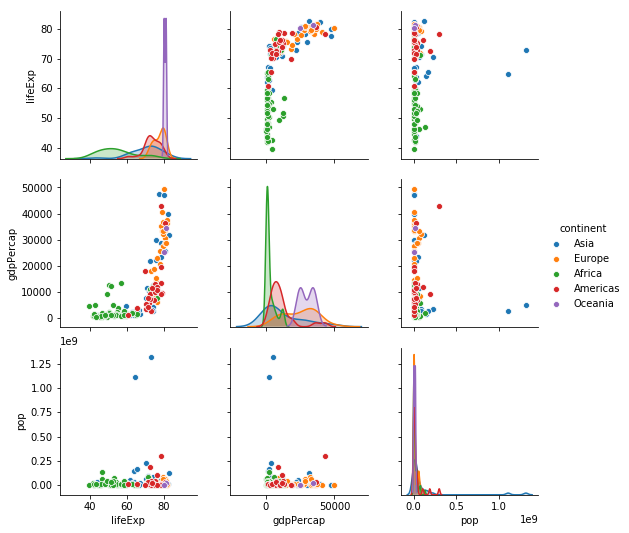

In [32]:
tmp = gapminder[gapminder.year==2007]
sns.pairplot(
    data = tmp[["lifeExp","gdpPercap","pop","continent"]],
    hue = 'continent'
)

## 1.6. heatmap

`sns.heatmap`은 히트맵을 그리는 함수입니다. 히트맵은 상관계수를 시각화하는 경우에 자주 사용됩니다. 아래 예시 코드를 보겠습니다. 먼저 데이터프레임의 corr() 메소드를 사용하여 변수들 간의 상관관계를 구합니다. 연도를 2007년으로 고정하였으므로 year 변수와 다른 변수들과의 상관계수는 NA입니다. 이렇게 만들어진 상관계수 테이블을 `sns.heatmap` 함수에 집어넣기만 하면 됩니다. `annot=True` 는 히트맵에 값을 직접 표시하는 기능을 합니다.

In [33]:
tmp = gapminder[gapminder.year==2007].drop("year",axis=1).corr()
tmp

,lifeExp,pop,gdpPercap
lifeExp,1.000000,0.047553,0.678662
pop,0.047553,1.000000,-0.055676
gdpPercap,0.678662,-0.055676,1.000000


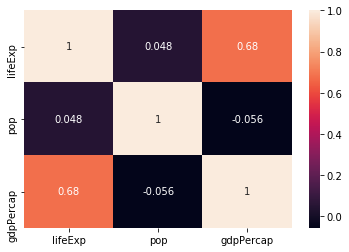

In [34]:
sns.heatmap(
    data = gapminder[gapminder.year==2007].drop("year",axis=1).corr(),
    annot=True
)

# 2. matplotlib 기초

지금까지 seaborn으로 그릴 수 있는 기본적인 플롯들에 대해서 배웠습니다. 이번에는 matplotlib을 활용하여 간단하게 플롯을 스타일링하는 방법과 matplotlib 플롯의 구조에 대해 배워볼 것입니다.

## 2.1. 플롯 스타일

matplotlib 은 여러 가지 플롯 스타일을 지원합니다. `plt.style.available` 속성을 통해서 사용 가능한 스타일들을 확인할 수 있습니다. 예를 들어 seaborn 산점도를 R의 ggplot 스타일로 그리는 것도 가능합니다.

In [ ]:
plt.style.available

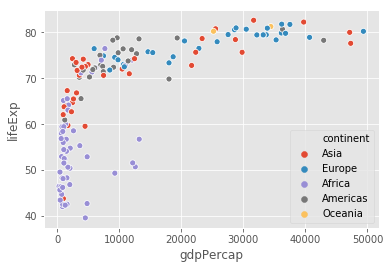

In [36]:
plt.style.use('ggplot')
sns.scatterplot(
   data= gapminder[gapminder.year==2007],
   x = "gdpPercap",
   y = "lifeExp",
   hue = 'continent'
)

## 2.3. matplotlib 플롯의 구조

![matplotlib-anatomy](https://pbpython.com/images/matplotlib-anatomy.png)

맷플롯립이 그려주는 하나의 figure는 위와 같이 분해할 수 있습니다. 우리가 여기서 다룰 구성요소들은 다음과 같습니다.

- Figure: 하나의 플롯 객체, 하나 이상의 Axes를 포함할 수 있음
- Axes: 개별 플롯
- Title: 플롯 제목
- X axis label,Y axis label: x,y 축 제목
- Legend: 범례

### 피규어 생성: plt.figure()

plt.figure() 함수는 하나의 피규어를 생성하는 동시에, 피규어의 여러 속성을 지정할 수 있습니다. 주로 figsize 인자를 통해 피규어의 크기를 조정할 때 사용합니다. 가장 윗 줄에서 `plt.figure` 함수로 피규어를 생성한 후, 똑같이 seaborn을 활용해서 플롯을 그려주면 됩니다.

인자|내용/기능
---|---
figsize|(width,height) 형식으로 피규어의 크기를 지정합니다. 단위는 인치입니다.
facecolor|배경 색
edgecolor|테두리 색

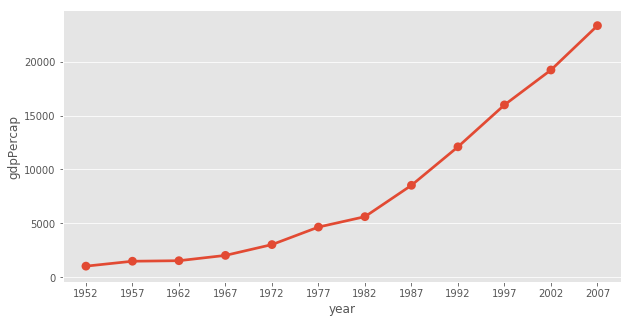

In [37]:
plt.figure(figsize = (10,5))
sns.pointplot(
    data=gapminder[gapminder.country=="Korea, Rep."],
    x = "year",
    y = "gdpPercap"
)

### 플롯의 제목, XY라벨, 범례 수정하기

In [ ]:
plt.rcParams["font.family"] = 'NanumSquare' # 글꼴 지정
plt.title("원하는 제목", fontsize=원하는크기) # 제목 지정
plt.xlabel("원하는 라벨", fontsize=원하는크기) # x축 라벨 지정
plt.ylabel("원하는 라벨", fontsize=원하는크기) # y축 라벨 지정
plt.legend(labels=['원하는 텍스트'],loc='원하는 위치') # 범례 지정

제목과 라벨, 범례를 다루기 전에 먼저 matplotlib 에서 한글 폰트를 사용할 수 있도록 설정해주세요. [나눔글꼴](https://hangeul.naver.com/2017/nanum)을 설치하신 후, 맘에 드는 글꼴을 적용해주세요. 제목, XY라벨, 범례를 수정하는 방법은 모두 비슷합니다. 플롯을 그리는 코드 다음에 제목과 라벨을 수정하는 코드를 추가해주면 됩니다.

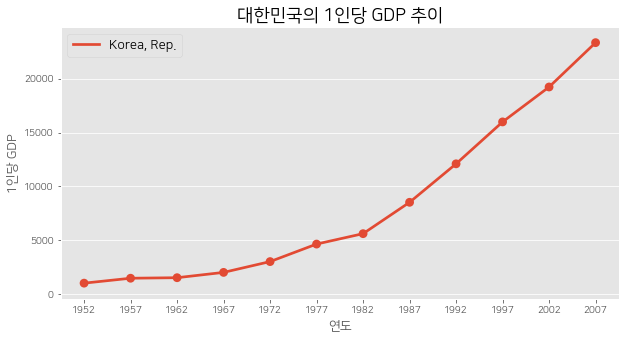

In [38]:
plt.rcParams["font.family"] = 'NanumSquare' # 글꼴 지정
plt.figure(figsize=(10,5))
sns.pointplot(
    data=gapminder[gapminder.country=="Korea, Rep."],
    x = "year",
    y = "gdpPercap"
)
plt.title("대한민국의 1인당 GDP 추이", fontsize=18)
plt.xlabel("연도", fontsize=13)
plt.ylabel("1인당 GDP", fontsize=13)
plt.legend(labels=['Korea, Rep.'], loc='best', fontsize=13)

# 참고자료

- [seaborn API Reference](https://seaborn.pydata.org/api.html)
- [The Matplotlib API](https://matplotlib.org/3.0.3/api/index.html)
- Chris Moffitt, [Effectively Using Matplotlib](https://pbpython.com/effective-matplotlib.html)